In [1]:
import numpy as np
import keras
from keras.utils import to_categorical 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.losses import sparse_categorical_crossentropy
from keras.layers import Dense, Dropout, Activation, Input
from keras.optimizers import Adam
from keras import models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Load Data

In [2]:
#paramter definition
img_width, img_height, img_num_channels = 32, 32, 3
verbosity=1
optimizer = Adam()
loss_function = 'sparse_categorical_crossentropy'

In [3]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()
# Determine shape of the data

input_shape = (img_width, img_height, img_num_channels)
print(input_shape)

(32, 32, 3)


# Normalize Data

In [4]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Validation Data Split 

In [5]:
input_train,x_valid = input_train[5000:],input_train[:5000]
target_train,y_valid = target_train[5000:],target_train[:5000]

print(input_train.shape)
print(target_train.shape)

print(x_valid.shape)
print(y_valid.shape)

(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)


# Basic Model

In [6]:
def basic_model():
    model = Sequential()
    model.add(Conv2D(32,activation = 'relu',kernel_size = (3,3)))
    model.add(Flatten(input_shape = (32,32,3)))
    model.add(Dense(10, activation = 'softmax'))
#compile model 
    model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
#model history 
    history = model.fit(input_train, target_train,
              batch_size=128,
              epochs=100,
              verbose=1,
              validation_data=(x_valid,y_valid))
#History Recall 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
#plot history loss
    plt.plot(history.history['val_loss'])
    plt.title('Validation loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.show()

#plot history accuracy
    plt.plot(history.history['val_accuracy'])
    plt.title('Validation accuracy history')
    plt.ylabel('Accuracy value (%)')
    plt.xlabel('No. epoch')
    plt.show()
#model accuracy 
    score = model.evaluate(input_test, target_test, verbose=0)
    print('Test loss: {}'.format(score[0]))
    print('Test accuracy: {}'.format(score[1]))
    
    return model


Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 15s 335us/step - loss: 1.5992 - accuracy: 0.4372 - val_loss: 1.3890 - val_accuracy: 0.5124
Epoch 2/100
45000/45000 [==============================] - 15s 335us/step - loss: 1.3276 - accuracy: 0.5335 - val_loss: 1.3392 - val_accuracy: 0.5236
Epoch 3/100
45000/45000 [==============================] - 19s 428us/step - loss: 1.2623 - accuracy: 0.5574 - val_loss: 1.3081 - val_accuracy: 0.5408
Epoch 4/100
45000/45000 [==============================] - 17s 374us/step - loss: 1.2068 - accuracy: 0.5796 - val_loss: 1.3202 - val_accuracy: 0.5370
Epoch 5/100
45000/45000 [==============================] - 16s 357us/step - loss: 1.1768 - accuracy: 0.5899 - val_loss: 1.2949 - val_accuracy: 0.5466
Epoch 6/100
45000/45000 [==============================] - 16s 354us/step - loss: 1.1473 - accuracy: 0.5994 - val_loss: 1.3067 - val_accuracy: 0.5474
Epoch 7/100
45000/45000 [==========================

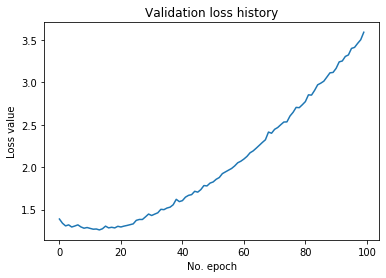

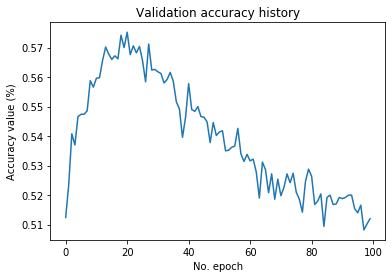

Test loss: 3.5052454357147216
Test accuracy: 0.504800021648407


In [7]:
base_model=basic_model()

# Create Baseline Models (Clear Overfit)

We will create a 3 basic baseline models ranging from 1 to 3 VGG Archsitectures, to provide ourselves with a general overview of the data itself and how it fits to the model. From this we will then refine the paramters further to make the model that lies best between over and under fitting. 

## Fit Model (1 VGG Block)

In [8]:
# 1-block VGG style architecture model
def baselineCNN(epochs='epochs',batch_size='batch_size',no_classes='no_classes'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(no_classes, activation='softmax'))
#compile model 
    model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
#fit model
    history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbosity,
            validation_data=(x_valid,y_valid))
#History Recall 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
#Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

#Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
#model accuracy
    score = model.evaluate(input_train, target_train,
                       batch_size=batch_size, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])
#model summary 
    model.summary()
    return model

## Model Run

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 67s 1ms/step - loss: 1.8508 - accuracy: 0.3386 - val_loss: 1.5655 - val_accuracy: 0.4302
Epoch 2/100
45000/45000 [==============================] - 66s 1ms/step - loss: 1.5082 - accuracy: 0.4572 - val_loss: 1.4543 - val_accuracy: 0.4804
Epoch 3/100
45000/45000 [==============================] - 65s 1ms/step - loss: 1.4019 - accuracy: 0.4942 - val_loss: 1.4135 - val_accuracy: 0.4988
Epoch 4/100
45000/45000 [==============================] - 67s 1ms/step - loss: 1.3165 - accuracy: 0.5259 - val_loss: 1.3550 - val_accuracy: 0.5210
Epoch 5/100
45000/45000 [==============================] - 65s 1ms/step - loss: 1.2196 - accuracy: 0.5634 - val_loss: 1.2920 - val_accuracy: 0.5478
Epoch 6/100
45000/45000 [==============================] - 67s 1ms/step - loss: 1.1302 - accuracy: 0.5972 - val_loss: 1.2748 - val_accuracy: 0.5538
Epoch 7/100
45000/45000 [==============================] - 65s 

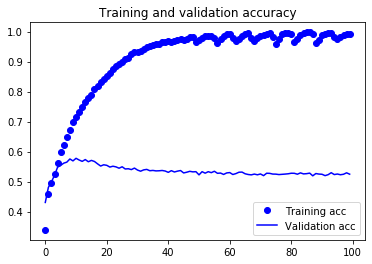

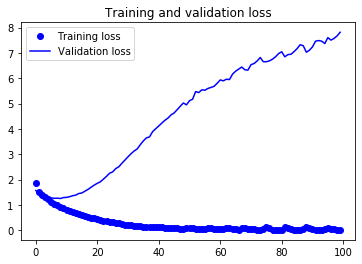

45000/45000 [==============================] - 15s 335us/step
Train Score: 0.018253288689669637
Train Accuracy 0.9941999912261963
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1

In [9]:
base_model=baselineCNN(100,128,10)

We can clearly see the model is overfitting on the training data. The first graph showing the validation loss on the validation and train set shows us that the loss is decreasing continuously on the training set whereas in the validation set it is constantly increasing. In the second graph we can see that the training accuracy sharply increases and then steadies off whereas the valdiation accuracy increases and then decreases until it steadies off as it approaches the 100 epoch mark. 

## Fit Model (2 VGG Block)

In [10]:
# 2-block VGG style architecture model
def baselineCNN2(epochs='epochs',batch_size='batch_size',no_classes='no_classes'):
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = input_shape))
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(no_classes, activation = 'softmax'))
#compile model 
    model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
#fit model
    history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbosity,
            validation_data=(x_valid,y_valid))
#History Recall 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
#Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

#Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
#model accuracy
    score = model.evaluate(input_train, target_train,
                       batch_size=batch_size, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])
#model summary 
    model.summary()
    return model

## Model Run

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 117s 3ms/step - loss: 1.6844 - accuracy: 0.3876 - val_loss: 1.3176 - val_accuracy: 0.5290
Epoch 2/100
45000/45000 [==============================] - 117s 3ms/step - loss: 1.1895 - accuracy: 0.5732 - val_loss: 1.0929 - val_accuracy: 0.6122
Epoch 3/100
45000/45000 [==============================] - 117s 3ms/step - loss: 1.0097 - accuracy: 0.6411 - val_loss: 1.0033 - val_accuracy: 0.6480
Epoch 4/100
45000/45000 [==============================] - 117s 3ms/step - loss: 0.9021 - accuracy: 0.6792 - val_loss: 0.9399 - val_accuracy: 0.6678
Epoch 5/100
45000/45000 [==============================] - 117s 3ms/step - loss: 0.8131 - accuracy: 0.7103 - val_loss: 0.9335 - val_accuracy: 0.6660
Epoch 6/100
45000/45000 [==============================] - 117s 3ms/step - loss: 0.7332 - accuracy: 0.7410 - val_loss: 0.9213 - val_accuracy: 0.6880
Epoch 7/100
45000/45000 [==============================] 

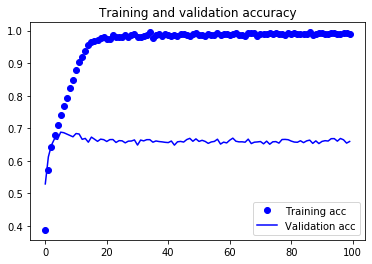

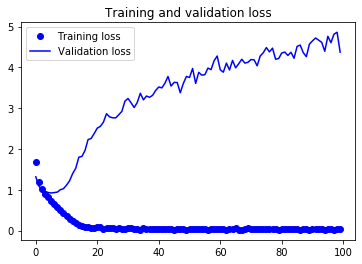

45000/45000 [==============================] - 30s 670us/step
Train Score: 0.01821375331564082
Train Accuracy 0.9940444231033325
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0 

In [11]:
base_model2=baselineCNN2(100,128,10)

We can see the training accuracy has signifcantly increased indicating that this baseline model is fitting better than the 1 VGG Block Model. The training accuracy has increased and then steadied off at a higher level than the 1 VGG Model. We can also see that the validation loss has increased and the training loss has decreased and has followed the same trend as the 1 VGG Model however we have reduced the loss to a maxium of 5 which is significantly less than the 1 VGG Model maximum loss. We are still overfitting the model, however we have reduced the validation loss and increased the training accuracy. The goal is to have the validation and training loss equal or very close to each whilst maximising the training accuracy to guide us the the best model. We will now constrcut and run our last Baseline Model with a 3 Block VGG Style Architecture and do a final comparison before refining the mdoel further. We can also see by looking at the graph that the validation accuracy has increased by nearly 10% indicating the unseen holdout data is fitting better on this model than the previous one further supporting our model improvement. 

## Fit Model (3 VGG Block)

In [12]:
# 3-block VGG style architecture model
def baselineCNN3(epochs='epochs',batch_size='batch_size',no_classes='no_classes'):
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(no_classes, activation = 'softmax'))
#compile model 
    model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
#fit model
    history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbosity,
            validation_data=(x_valid,y_valid))
#History Recall 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
#Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

#Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
#model accuracy
    score = model.evaluate(input_train, target_train,
                       batch_size=batch_size, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])
#model summary 
    model.summary()
    return model

## Model Run

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 158s 4ms/step - loss: 1.7017 - accuracy: 0.3730 - val_loss: 1.3000 - val_accuracy: 0.5258
Epoch 2/100
45000/45000 [==============================] - 159s 4ms/step - loss: 1.1754 - accuracy: 0.5795 - val_loss: 1.0646 - val_accuracy: 0.6148
Epoch 3/100
45000/45000 [==============================] - 159s 4ms/step - loss: 0.9863 - accuracy: 0.6526 - val_loss: 0.9716 - val_accuracy: 0.6560
Epoch 4/100
45000/45000 [==============================] - 160s 4ms/step - loss: 0.8628 - accuracy: 0.6955 - val_loss: 0.9085 - val_accuracy: 0.6820
Epoch 5/100
45000/45000 [==============================] - 159s 4ms/step - loss: 0.7520 - accuracy: 0.7354 - val_loss: 0.9048 - val_accuracy: 0.6864
Epoch 6/100
45000/45000 [==============================] - 159s 4ms/step - loss: 0.6678 - accuracy: 0.7655 - val_loss: 0.8636 - val_accuracy: 0.6990
Epoch 7/100
45000/45000 [==============================] 

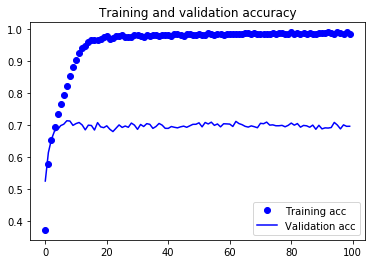

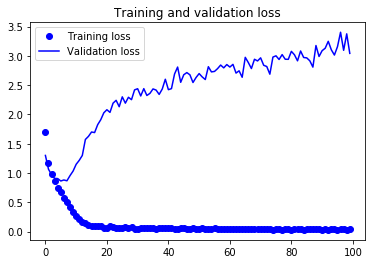

45000/45000 [==============================] - 40s 885us/step
Train Score: 0.04133055809876985
Train Accuracy 0.9869999885559082
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0 

In [13]:
base_model3=baselineCNN3(100,128,10)

We can see that the 3 VGG Block Model has shown a large improvement from the 2 VGG Block Model. We have reduced the total numnber of paramaters of our model in addition to lifting our valdiation accuracy to over 70% alognside reducing the gap between the Validation and Training Loss indicating that we have further reduced the overfitting of the model.As we can also see, we have made the long term validtion accuracy steady off more aswell indicating the model is leveling out and performing better. We will be using the 3 VGG Architecture Block Model as our Base Line Model.  

# Drop Out Regularization Model

We are now going to implement dropout layers within our best baseline model to further improve it. At each training interval, the indiviudal nodes will be dropped out of the over all probability calculation or retained. This will result in a redcued size network where the incoming and ougoing layers will be dropped out and reduced. For this we will use a Dropout Rate of: 0.2,0.4 and 0.6 and then determine our best model to then add Data Augmentation to. 

For example if we use a dropout rate of 0.4, then 40% of the nodes will be disregarded and 60% will be kept. 

We will use the same number of epochs and batch size due to resource constraints. 

## Define General Dropout Model 

In [14]:
# 3-block VGG style architecture model
def bestbase_drop(epochs='epochs',batch_size='batch_size',no_classes='no_classes',dropout='dropout'):
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    
    model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(no_classes, activation = 'softmax'))
######################################
#compile model 
    model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
#fit model
    history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbosity,
            validation_data=(x_valid,y_valid))
#History Recall 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
#Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

#Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
#model accuracy
    score = model.evaluate(input_train, target_train,
                       batch_size=batch_size, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])
#model summary 
    model.summary()
    return model

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 179s 4ms/step - loss: 2.0229 - accuracy: 0.2473 - val_loss: 1.5639 - val_accuracy: 0.4176
Epoch 2/100
45000/45000 [==============================] - 187s 4ms/step - loss: 1.4378 - accuracy: 0.4690 - val_loss: 1.2638 - val_accuracy: 0.5464
Epoch 3/100
45000/45000 [==============================] - 185s 4ms/step - loss: 1.2117 - accuracy: 0.5630 - val_loss: 1.0399 - val_accuracy: 0.6342
Epoch 4/100
45000/45000 [==============================] - 184s 4ms/step - loss: 1.0424 - accuracy: 0.6272 - val_loss: 0.9132 - val_accuracy: 0.6798
Epoch 5/100
45000/45000 [==============================] - 194s 4ms/step - loss: 0.9374 - accuracy: 0.6680 - val_loss: 0.8420 - val_accuracy: 0.7082
Epoch 6/100
45000/45000 [==============================] - 175s 4ms/step - loss: 0.8525 - accuracy: 0.6974 - val_loss: 0.8013 - val_accuracy: 0.7220
Epoch 7/100
45000/45000 [==============================] 

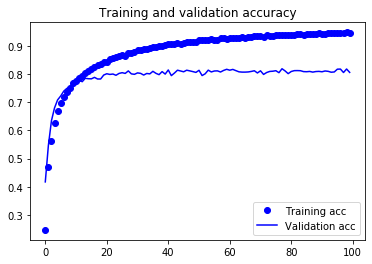

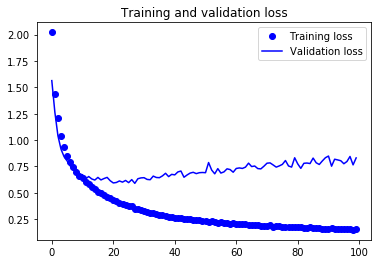

45000/45000 [==============================] - 54s 1ms/step
Train Score: 0.026008896731005773
Train Accuracy 0.9929777979850769
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        36

In [15]:
model_drop1=bestbase_drop(100,128,10,0.2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 208s 5ms/step - loss: 2.0002 - accuracy: 0.2612 - val_loss: 1.8658 - val_accuracy: 0.3298
Epoch 2/100
45000/45000 [==============================] - 200s 4ms/step - loss: 1.5479 - accuracy: 0.4290 - val_loss: 1.6477 - val_accuracy: 0.4060
Epoch 3/100
45000/45000 [==============================] - 216s 5ms/step - loss: 1.3612 - accuracy: 0.4991 - val_loss: 1.4038 - val_accuracy: 0.4934
Epoch 4/100
45000/45000 [==============================] - 221s 5ms/step - loss: 1.2496 - accuracy: 0.5487 - val_loss: 1.2804 - val_accuracy: 0.5474
Epoch 5/100
45000/45000 [==============================] - 198s 4ms/step - loss: 1.1660 - accuracy: 0.5812 - val_loss: 1.1840 - val_accuracy: 0.5810
Epoch 6/100
45000/45000 [==============================] - 205s 5ms/step - loss: 1.0876 - accuracy: 0.6117 - val_loss: 1.1042 - val_accuracy: 0.6088
Epoch 7/100
45000/45000 [==============================] 

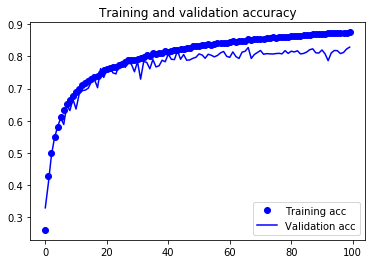

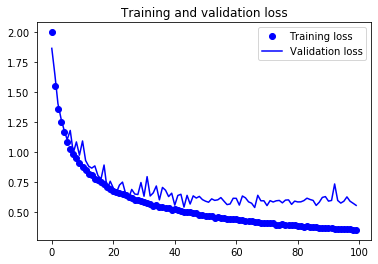

45000/45000 [==============================] - 44s 982us/step
Train Score: 0.15170104808542464
Train Accuracy 0.9502888917922974
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 64)        3

In [16]:
model_drop2=bestbase_drop(100,128,10,0.4)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 165s 4ms/step - loss: 1.9854 - accuracy: 0.2631 - val_loss: 2.0232 - val_accuracy: 0.2676
Epoch 2/100
45000/45000 [==============================] - 163s 4ms/step - loss: 1.6287 - accuracy: 0.3891 - val_loss: 1.8199 - val_accuracy: 0.3506
Epoch 3/100
45000/45000 [==============================] - 162s 4ms/step - loss: 1.5130 - accuracy: 0.4405 - val_loss: 1.8354 - val_accuracy: 0.3482
Epoch 4/100
45000/45000 [==============================] - 162s 4ms/step - loss: 1.4211 - accuracy: 0.4796 - val_loss: 1.5978 - val_accuracy: 0.4208
Epoch 5/100
45000/45000 [==============================] - 162s 4ms/step - loss: 1.3718 - accuracy: 0.4996 - val_loss: 1.9452 - val_accuracy: 0.3440
Epoch 6/100
45000/45000 [==============================] - 162s 4ms/step - loss: 1.3162 - accuracy: 0.5218 - val_loss: 1.7108 - val_accuracy: 0.4092
Epoch 7/100
45000/45000 [==============================] 

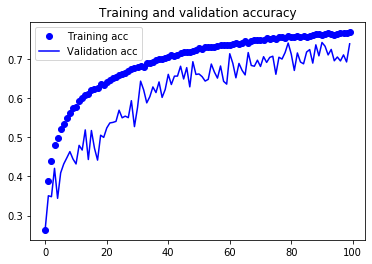

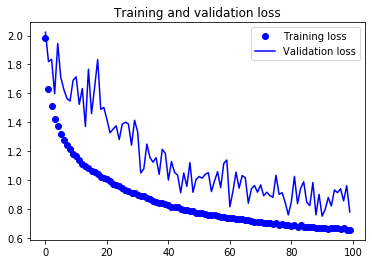

45000/45000 [==============================] - 44s 986us/step
Train Score: 0.6474862052493625
Train Accuracy 0.7729777693748474
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 64)        36

In [17]:
model_drop3=bestbase_drop(100,128,10,0.6)

From the dropout models above we can see that the best one is the one with a dropout rate of 0.4. The three different models all represent different ouput grapsh representing different overfitting levels within the model. 

# Data Augmentation

We will begin by applying data augmentation to our exisiting best dropout model. Data augmentation will allow us to artificially expand the size of our input data through developing altered versions of the pre-exisiting images within the dataset.  We will make use of a variety of parameters that will all hopefully increase our final model accuracy. 

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization

In [19]:
# set up image augmentation
datagen = ImageDataGenerator(
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    horizontal_flip=True
    )
datagen.fit(input_train)

In [20]:
# 3-block VGG style architecture model
def dataaug(epochs='epochs',batch_size='batch_size',no_classes='no_classes',dropout='dropout'):
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    
    model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(dropout))
    
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(BatchNormalization(axis=-1))
    model.add(Dense(no_classes, activation = 'softmax'))
######################################
#compile model 
    model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
#fit model
    history=model.fit_generator(datagen.flow(input_train, target_train, batch_size=128),
                    steps_per_epoch = len(input_train) / 128, epochs=100, validation_data=(x_valid,y_valid))
#History Recall 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
#Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

#Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
#model accuracy
    score = model.evaluate(input_train, target_train,
                       batch_size=batch_size, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])
#model summary 
    model.summary()
    return model

Epoch 1/100
352/351 [==============================] - 246s 698ms/step - loss: 1.7276 - accuracy: 0.3718 - val_loss: 2.0488 - val_accuracy: 0.3806
Epoch 2/100
352/351 [==============================] - 267s 758ms/step - loss: 1.4510 - accuracy: 0.4768 - val_loss: 1.3388 - val_accuracy: 0.5438
Epoch 3/100
352/351 [==============================] - 246s 698ms/step - loss: 1.3267 - accuracy: 0.5209 - val_loss: 1.4730 - val_accuracy: 0.5100
Epoch 4/100
352/351 [==============================] - 252s 716ms/step - loss: 1.2441 - accuracy: 0.5520 - val_loss: 1.5564 - val_accuracy: 0.5004
Epoch 5/100
352/351 [==============================] - 256s 726ms/step - loss: 1.1950 - accuracy: 0.5730 - val_loss: 1.1813 - val_accuracy: 0.6014
Epoch 6/100
352/351 [==============================] - 233s 661ms/step - loss: 1.1389 - accuracy: 0.5943 - val_loss: 1.3569 - val_accuracy: 0.5648
Epoch 7/100
352/351 [==============================] - 235s 666ms/step - loss: 1.0970 - accuracy: 0.6116 - val_loss: 1

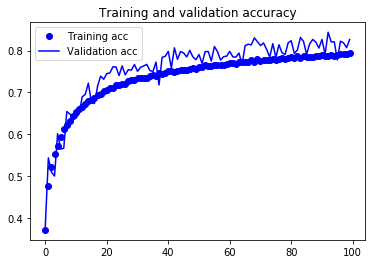

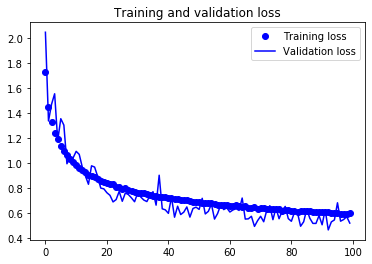

45000/45000 [==============================] - 65s 1ms/step
Train Score: 0.4585778973049588
Train Accuracy 0.8422222137451172
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0    

In [21]:
model_aug1=dataaug(100,128,10,0.4)

The overall training accuracy of the model was 84.2% which was a 10% reduction from our best dropout model with a dropout rate of 0.4, in addition to its peak validation accuracy of 81%. When looking at total number of parameters, we have reduced them by 10 000 overall however the peak validation accuracy 84.6%. Another clear improvement we could see on the data augmentation model was the loss and accuracy curves. 

# Feature Extraction 

We will now apply feature extraction to the Data Augmentation Model to further refine the model and to increase the accuracy

## VGG16 Model

In [22]:
from keras.applications.vgg16 import VGG16
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import optimizers, regularizers,callbacks

In [23]:
conv_base = VGG16(
    weights='imagenet', 
    include_top=False, 
    input_shape=(32,32,3))

58892288/58889256 [==============================] - 5s 0us/step


In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [25]:
model_vgg = models.Sequential()
model_vgg.add(conv_base)
model_vgg.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg.add(BatchNormalization())
model_vgg.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg.add(BatchNormalization())
model_vgg.add(Dropout(0.4))
model_vgg.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg.add(BatchNormalization())
model_vgg.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg.add(BatchNormalization())
model_vgg.add(Dropout(0.4))
model_vgg.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg.add(BatchNormalization())
model_vgg.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg.add(BatchNormalization())
model_vgg.add(Dropout(0.4))
model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model_vgg.add(BatchNormalization())    
model_vgg.add(Dense(10, activation='softmax'))
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 32)          147488    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 32)          9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 1, 32)          128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 64)         

In [26]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_vgg.trainable_weights))

This is the number of trainable weights before freezing the conv base: 56


In [27]:
conv_base.trainable = False

In [28]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model_vgg.trainable_weights))

This is the number of trainable weights after freezing the conv base: 30


In [29]:
datagen_vgg = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    zoom_range=0.2,
    shear_range=0.2)

In [30]:
train_gen1=datagen_vgg.flow(
input_train,
target_train,
batch_size=128)

In [31]:
def vgg_model():
    #compile model 
    model_vgg.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    #fit model
    history_vgg=model_vgg.fit_generator(train_gen1,
                    steps_per_epoch = 351, epochs=100, validation_data=(x_valid,y_valid),verbose=1)
    #model accuracy
    score = model_vgg.evaluate(input_train, target_train,
                       batch_size=128, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])

    #model summary 
    model_vgg.summary()
    
    #History Recall 
    acc = history_vgg.history['accuracy']
    val_acc = history_vgg.history['val_accuracy']
    loss = history_vgg.history['loss']
    val_loss = history_vgg.history['val_loss']

    epochs = range(len(acc))
    #Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    #Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    return vgg_model


Epoch 1/100
351/351 [==============================] - 39s 110ms/step - loss: 1.6169 - accuracy: 0.4389 - val_loss: 1.3797 - val_accuracy: 0.5212
Epoch 2/100
351/351 [==============================] - 37s 106ms/step - loss: 1.5826 - accuracy: 0.4488 - val_loss: 1.3720 - val_accuracy: 0.5234
Epoch 3/100
351/351 [==============================] - 38s 107ms/step - loss: 1.5683 - accuracy: 0.4555 - val_loss: 1.3866 - val_accuracy: 0.5144
Epoch 4/100
351/351 [==============================] - 37s 105ms/step - loss: 1.5619 - accuracy: 0.4587 - val_loss: 1.3644 - val_accuracy: 0.5260
Epoch 5/100
351/351 [==============================] - 37s 104ms/step - loss: 1.5547 - accuracy: 0.4627 - val_loss: 1.3619 - val_accuracy: 0.5248
Epoch 6/100
351/351 [==============================] - 37s 106ms/step - loss: 1.5487 - accuracy: 0.4627 - val_loss: 1.3596 - val_accuracy: 0.5268
Epoch 7/100
351/351 [==============================] - 37s 104ms/step - loss: 1.5437 - accuracy: 0.4622 - val_loss: 1.3187 -

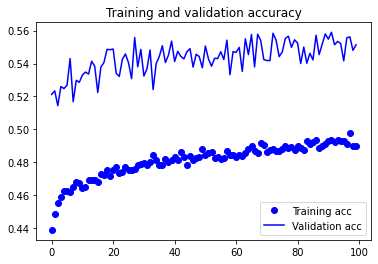

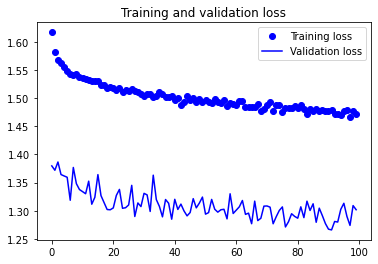

In [32]:
vgg_pre=vgg_model()

This VGG16 pre-tune model had an overall training accuracy of 56.48% and peak validation accuracy of just over 55%. From the graphs above the model has a large gap between the validation and training losses and accuracies indicating a very unbalanced model. 

# Adding Up Sampling Layer

In [33]:
from keras.layers import UpSampling2D

In [34]:
model_vgg_up = models.Sequential()
model_vgg_up.add(UpSampling2D(input_shape=(32,32,3)))
model_vgg_up.add(conv_base)
model_vgg_up.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up.add(BatchNormalization())
model_vgg_up.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up.add(BatchNormalization())
model_vgg_up.add(Dropout(0.4))
model_vgg_up.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up.add(BatchNormalization())
model_vgg_up.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up.add(BatchNormalization())
model_vgg_up.add(Dropout(0.4))
model_vgg_up.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up.add(BatchNormalization())
model_vgg_up.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up.add(BatchNormalization())
model_vgg_up.add(Dropout(0.4))
model_vgg_up.add(Flatten())
model_vgg_up.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model_vgg_up.add(BatchNormalization())    
model_vgg_up.add(Dense(10, activation='softmax'))
model_vgg_up.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_1 (UpSampling2 (None, 64, 64, 3)         0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 32)          147488    
_________________________________________________________________
batch_normalization_8 (Batch (None, 2, 2, 32)          128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 32)          9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 2, 2, 32)          128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 2, 32)         

In [35]:
conv_base.trainable = False

In [36]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model_vgg_up.trainable_weights))

This is the number of trainable weights after freezing the conv base: 30


In [37]:
def vgg_model_up():
    #compile model 
    model_vgg_up.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    #fit model
    history_vgg_up=model_vgg_up.fit_generator(train_gen1,
                    steps_per_epoch = 351, epochs=100, validation_data=(x_valid,y_valid),verbose=1)
    #model accuracy
    score = model_vgg_up.evaluate(input_train, target_train,
                       batch_size=128, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])

    #model summary 
    model_vgg_up.summary()
    
    #History Recall 
    acc = history_vgg_up.history['accuracy']
    val_acc = history_vgg_up.history['val_accuracy']
    loss = history_vgg_up.history['loss']
    val_loss = history_vgg_up.history['val_loss']

    epochs = range(len(acc))
    #Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    #Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    return vgg_model_up


Epoch 1/100
351/351 [==============================] - 54s 154ms/step - loss: 1.8427 - accuracy: 0.3336 - val_loss: 1.4368 - val_accuracy: 0.4934
Epoch 2/100
351/351 [==============================] - 49s 140ms/step - loss: 1.5053 - accuracy: 0.4713 - val_loss: 1.2529 - val_accuracy: 0.5602
Epoch 3/100
351/351 [==============================] - 49s 140ms/step - loss: 1.4232 - accuracy: 0.5031 - val_loss: 1.2299 - val_accuracy: 0.5650
Epoch 4/100
351/351 [==============================] - 49s 140ms/step - loss: 1.3785 - accuracy: 0.5219 - val_loss: 1.1459 - val_accuracy: 0.5948
Epoch 5/100
351/351 [==============================] - 49s 141ms/step - loss: 1.3433 - accuracy: 0.5345 - val_loss: 1.1130 - val_accuracy: 0.6032
Epoch 6/100
351/351 [==============================] - 49s 140ms/step - loss: 1.3310 - accuracy: 0.5415 - val_loss: 1.1811 - val_accuracy: 0.5966
Epoch 7/100
351/351 [==============================] - 49s 140ms/step - loss: 1.3098 - accuracy: 0.5469 - val_loss: 1.1240 -

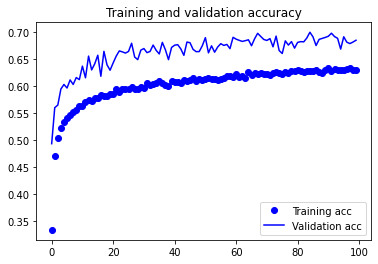

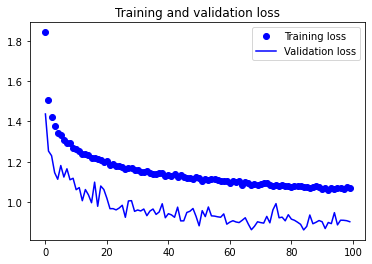

In [38]:
vgg_2=vgg_model_up()

We clearly see a significant overall increase in the overall train accuracy of the model at 70.56% and a peak validation accuracy of 70%. We can see a clear improvement in that the model is taking longer to steady off reducing overfitting, increased accuracy and a reduced gap between the validation and training losses and accuracies. This model has performed well from its base VGG model however due to the size of the parameters it will not be used. 

# Fine Tuning 

In [39]:
from keras import optimizers

In [40]:
model_vgg_up_tune = models.Sequential()
model_vgg_up_tune.add(UpSampling2D(input_shape=(32,32,3)))
model_vgg_up_tune.add(conv_base)
model_vgg_up_tune.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up_tune.add(BatchNormalization())
model_vgg_up_tune.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up_tune.add(BatchNormalization())
model_vgg_up_tune.add(Dropout(0.4))
model_vgg_up_tune.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up_tune.add(BatchNormalization())
model_vgg_up_tune.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up_tune.add(BatchNormalization())
model_vgg_up_tune.add(Dropout(0.4))
model_vgg_up_tune.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up_tune.add(BatchNormalization())
model_vgg_up_tune.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model_vgg_up_tune.add(BatchNormalization())
model_vgg_up_tune.add(Dropout(0.4))
model_vgg_up_tune.add(Flatten())
model_vgg_up_tune.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model_vgg_up_tune.add(BatchNormalization())    
model_vgg_up_tune.add(Dense(10, activation='softmax'))
model_vgg_up_tune.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_14 (UpSampling (None, 64, 64, 3)         0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 2, 2, 32)          147488    
_________________________________________________________________
batch_normalization_99 (Batc (None, 2, 2, 32)          128       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 2, 2, 32)          9248      
_________________________________________________________________
batch_normalization_100 (Bat (None, 2, 2, 32)          128       
_________________________________________________________________
dropout_43 (Dropout)         (None, 2, 2, 32)        

In [41]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [42]:
print('This is the number of trainable weights '
      'after unfreezing the conv base:', len(model_vgg_up_tune.trainable_weights))

This is the number of trainable weights after unfreezing the conv base: 36


In [43]:
def vgg_model_up_tune():
    #compile model 
    model_vgg_up_tune.compile(loss=loss_function,
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
    #fit model
    history_vgg_up_tune=model_vgg_up_tune.fit_generator(train_gen1,
                    steps_per_epoch = 351, epochs=100, validation_data=(x_valid,y_valid),verbose=1)
    #model accuracy
    score = model_vgg_up_tune.evaluate(input_train, target_train,
                       batch_size=128, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])

    #model summary 
    model_vgg_up_tune.summary()
    
    #History Recall 
    acc = history_vgg_up_tune.history['accuracy']
    val_acc = history_vgg_up_tune.history['val_accuracy']
    loss = history_vgg_up_tune.history['loss']
    val_loss = history_vgg_up_tune.history['val_loss']

    epochs = range(len(acc))
    #Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    #Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    return vgg_model_up_tune


Epoch 1/100
351/351 [==============================] - 58s 165ms/step - loss: 1.8171 - accuracy: 0.3637 - val_loss: 1.3271 - val_accuracy: 0.5366
Epoch 2/100
351/351 [==============================] - 56s 159ms/step - loss: 1.6976 - accuracy: 0.4036 - val_loss: 1.2147 - val_accuracy: 0.5724
Epoch 3/100
351/351 [==============================] - 56s 159ms/step - loss: 1.5932 - accuracy: 0.4421 - val_loss: 1.1190 - val_accuracy: 0.6096
Epoch 4/100
351/351 [==============================] - 56s 159ms/step - loss: 1.5079 - accuracy: 0.4743 - val_loss: 1.0582 - val_accuracy: 0.6400
Epoch 5/100
351/351 [==============================] - 56s 158ms/step - loss: 1.4328 - accuracy: 0.5028 - val_loss: 1.0149 - val_accuracy: 0.6516
Epoch 6/100
351/351 [==============================] - 56s 158ms/step - loss: 1.3828 - accuracy: 0.5232 - val_loss: 0.9655 - val_accuracy: 0.6672
Epoch 7/100
351/351 [==============================] - 56s 159ms/step - loss: 1.3368 - accuracy: 0.5396 - val_loss: 0.9872 -

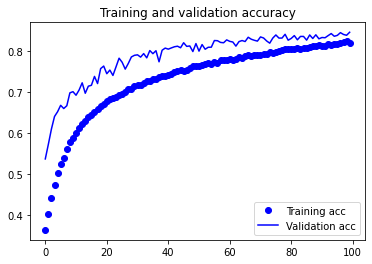

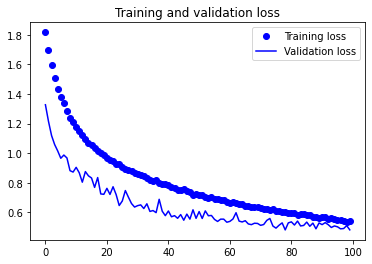

In [44]:
vgg_3=vgg_model_up_tune()

We will now finally tune the VGG model with a different optimizer to see the affect and unfreeze the layers to allow more of the layers to be trained. We get an overall training accuracy of just over 90% and a peak validation accuracy of just over 84%. The model also has reduced overfitting as seen by the graphs. But once again due to the larger number of parameters we will hesitate from using this model. However we will keep the same layers and structure. 

# Reducing Paramters 

As we can see from the model up we are producing a model that is not quickly overfitting but taking time to converge and the training loss and valdiation loss are quite close to each other, a similar trend seen within the accuracies aswell indicating that the model is performing well in not overfitting and identifying the data well both on the train and validation sets. We also need to note that the overall model train accuracy is equivalent to the data augmentation model indicating that the refinement has not increased the overall accuracy has not increased however has starkly increased the number of paramters. This is considered as good model as it has less noise than the previous model that performed similar and also has a high overall train accuracy and the model is not overfitting quickly. We will now move onto removing the pretrained VGG model from the existing layers and refine. 

In [45]:
train_gen2=datagen_vgg.flow(
input_train,
target_train,
batch_size=64)

In [46]:
model = Sequential()
model.add(UpSampling2D(input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_3 (UpSampling2 (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_50 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_51 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 64, 64, 32)      

In [47]:
def rf_model():
    #compile model 
    model.compile(loss=loss_function,
              optimizer=optimizers.RMSprop(lr=0.001,decay=1e-6),
              metrics=['accuracy'])
    #fit model
    history_rf1=model.fit_generator(train_gen2,
                    steps_per_epoch = 351, epochs=100, validation_data=(x_valid,y_valid),verbose=1)
    #model accuracy
    score = model.evaluate(input_train, target_train,
                       batch_size=64, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])
    
    #History Recall 
    acc = history_rf1.history['accuracy']
    val_acc = history_rf1.history['val_accuracy']
    loss = history_rf1.history['loss']
    val_loss = history_rf1.history['val_loss']

    epochs = range(len(acc))
    #Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    #Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    return rf_model


Epoch 1/100
351/351 [==============================] - 24s 69ms/step - loss: 2.7927 - accuracy: 0.2719 - val_loss: 1.6054 - val_accuracy: 0.4032
Epoch 2/100
351/351 [==============================] - 23s 64ms/step - loss: 2.2595 - accuracy: 0.3787 - val_loss: 1.7551 - val_accuracy: 0.4582
Epoch 3/100
351/351 [==============================] - 23s 65ms/step - loss: 1.9666 - accuracy: 0.4299 - val_loss: 1.8144 - val_accuracy: 0.4484
Epoch 4/100
351/351 [==============================] - 23s 65ms/step - loss: 1.9072 - accuracy: 0.4650 - val_loss: 2.0351 - val_accuracy: 0.4854
Epoch 5/100
351/351 [==============================] - 23s 65ms/step - loss: 1.9922 - accuracy: 0.4812 - val_loss: 2.5302 - val_accuracy: 0.5158
Epoch 6/100
351/351 [==============================] - 23s 65ms/step - loss: 1.9031 - accuracy: 0.4960 - val_loss: 1.8822 - val_accuracy: 0.5328
Epoch 7/100
351/351 [==============================] - 23s 65ms/step - loss: 1.8286 - accuracy: 0.5223 - val_loss: 1.2395 - val_ac

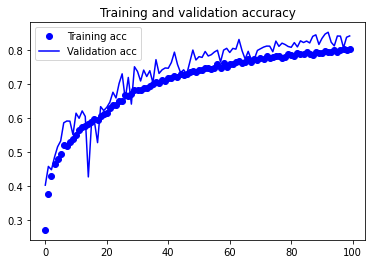

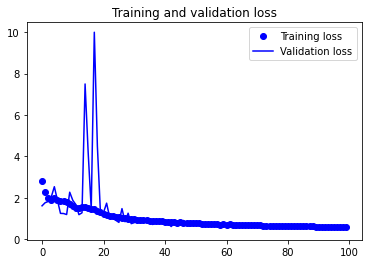

In [48]:
rf_model_1=rf_model()

We can see that by reducing the parameters by 15 times we are able to increase the accuracy of the model, in particular the validation accuracy which peaks at approximately 83% however we are stil able to do better as we still have alot of paramaters. However, it should be noted that the model is doing very well in finding a balance between over and under fitting. The graphs clearly show us that the loss and accuracy for both training and validation is very close to each other and in some cases on top of each other indicating that the model is equally doing well on both the training and holdout set indicating it is able to consistently keep the same model fit on the unseen data. We will now reduce the parameters further, to do this we will reduce the size of the last two layers and also investigate the affect of removing the dropout layers to increase the overall time taken to train the model. 

In [49]:
model2 = Sequential()
model2.add(UpSampling2D(input_shape=(32,32,3)))
model2.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform',))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
 
model2.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_1 (UpSampling2 (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_42 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_43 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 64, 64, 32)       

In [50]:
def rf_model2():
    #compile model 
    model2.compile(loss=loss_function,
              optimizer=optimizers.Adam(lr=0.001,decay=1e-6),
              metrics=['accuracy'])
    #fit model
    history_rf=model2.fit_generator(train_gen2,
                    steps_per_epoch = 351, epochs=100, validation_data=(x_valid,y_valid),verbose=1)
    #model accuracy
    score = model2.evaluate(input_train, target_train,
                       batch_size=64, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])
    
    #History Recall 
    acc = history_rf.history['accuracy']
    val_acc = history_rf.history['val_accuracy']
    loss = history_rf.history['loss']
    val_loss = history_rf.history['val_loss']

    epochs = range(len(acc))
    #Plot Accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    #Plot Loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    return rf_model2


Epoch 1/100
351/351 [==============================] - 23s 65ms/step - loss: 1.9276 - accuracy: 0.3550 - val_loss: 1.5507 - val_accuracy: 0.4432
Epoch 2/100
351/351 [==============================] - 21s 60ms/step - loss: 1.6460 - accuracy: 0.4294 - val_loss: 1.5180 - val_accuracy: 0.5056
Epoch 3/100
351/351 [==============================] - 21s 60ms/step - loss: 1.4716 - accuracy: 0.4842 - val_loss: 2.2064 - val_accuracy: 0.4532
Epoch 4/100
351/351 [==============================] - 21s 59ms/step - loss: 1.3792 - accuracy: 0.5217 - val_loss: 1.3195 - val_accuracy: 0.5606
Epoch 5/100
351/351 [==============================] - 21s 60ms/step - loss: 1.2507 - accuracy: 0.5639 - val_loss: 1.2932 - val_accuracy: 0.5872
Epoch 6/100
351/351 [==============================] - 21s 59ms/step - loss: 1.1654 - accuracy: 0.5930 - val_loss: 1.0561 - val_accuracy: 0.6450
Epoch 7/100
351/351 [==============================] - 21s 60ms/step - loss: 1.1153 - accuracy: 0.6130 - val_loss: 1.0031 - val_ac

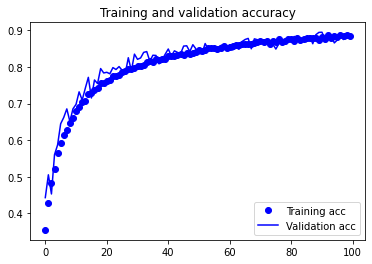

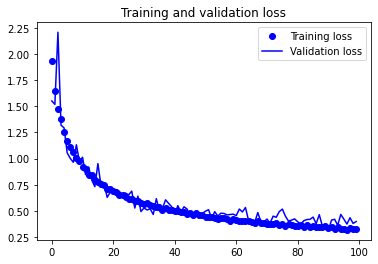

In [51]:
rf_model_2=rf_model2()

After reducing our number of parameters we can see we have reduced the total number of parameters down to 590 thousand which is a significant reduction from our model before. It can also be seen the model performed better with a lower validation and training loss in addition to a higher training and validation loss. The removal of the dropout layer also proved to be beneficial in that it had a contribution to increasing the final accuracy. We will use this as our best model as it is providing a very good balance between the losses and accuracy represented within the graphs above. This model will be visualized and investigated further to show us the features it learnt. Below is also the final Test Accuracy of this model on the Test Data Set that the model has not seen as yet. We have also been able to increase our train accuracy by 5% and have been able to increase our peak validation accuracy to just over 87%. 

In [52]:
score = model2.evaluate(input_test, target_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.44026243468523024
Test accuracy: 0.8705000281333923


# Best Model Visualization 

In [53]:
from google.colab import files
uploaded = files.upload()

Saving Truck1.jpg to Truck1.jpg


In [54]:
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img('Truck1.jpg', target_size=(32,32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 32, 32, 3)


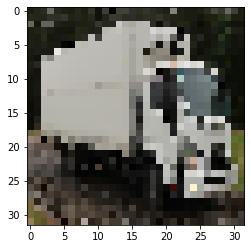

In [55]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [56]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model2.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model2.input, outputs=layer_outputs)

In [57]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [58]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 32, 32, 32)


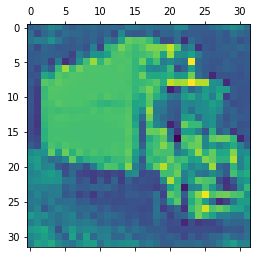

In [59]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

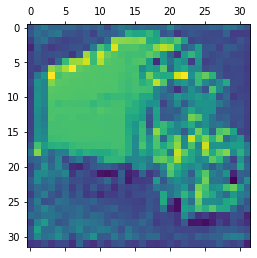

In [60]:
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
plt.show()

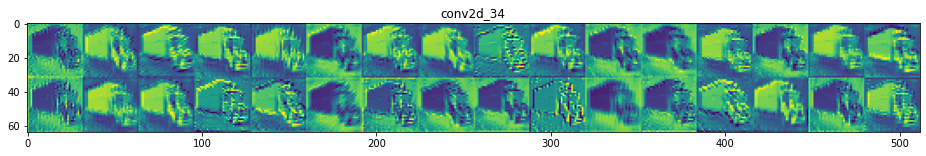

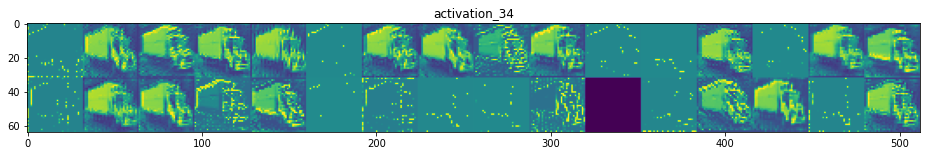

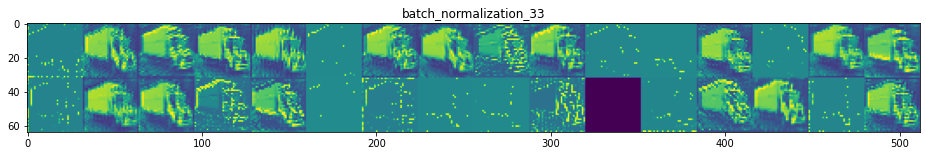

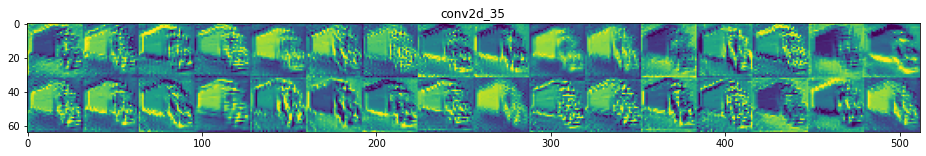

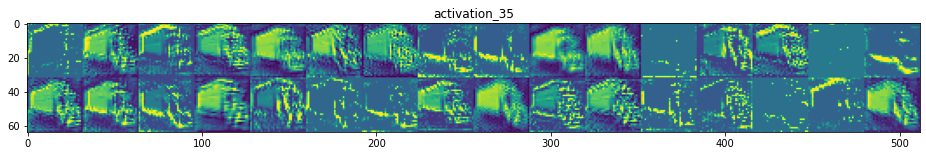

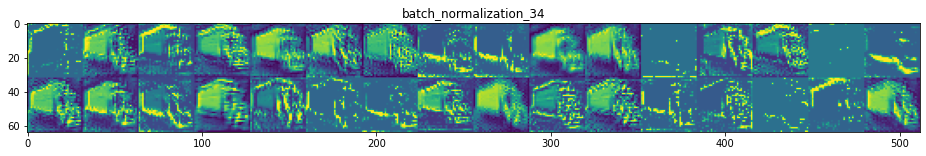

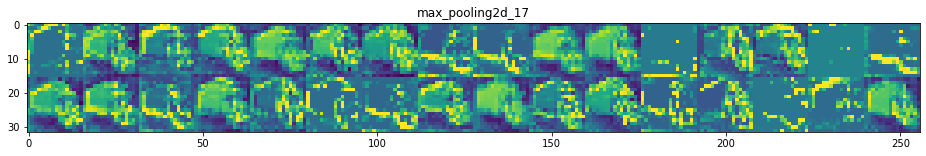

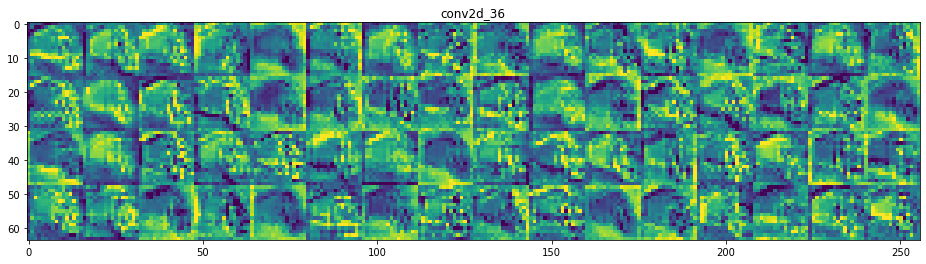

In [61]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model2.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

# Best Model Prediction Grid

In [62]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

In [63]:
y_pred_test = model2.predict_proba(input_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

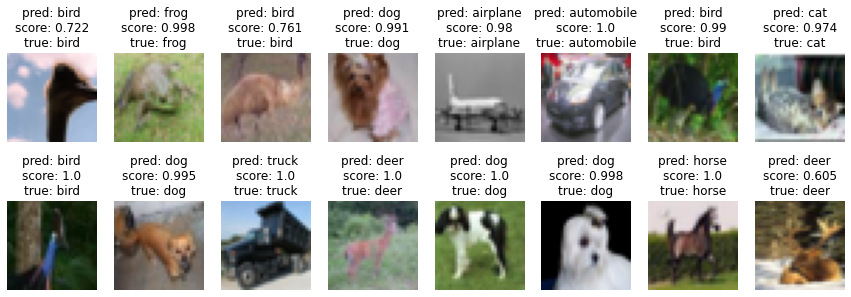

In [64]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(target_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(input_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[target_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()